In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import os

In [4]:
results_path = '../results/sparse'
results = filter(lambda x: x.split('.')[-1]=='csv', os.listdir(results_path))
results = list(results)
results

['1687110313.4437766.6.csv',
 '1687110419.5672855.5.csv',
 '1687110522.7915864.4.csv',
 '1687110657.3421829.3.csv',
 '1687111049.542516.1.csv',
 '1687110841.017301.2.csv']

In [18]:
os.listdir(results_path)[0].split('.')[-1]

'csv'

In [19]:
final = []
for filename in results:
    df = pd.read_csv(os.path.join(results_path, filename), header=None, names=['rovers', 'time'])
    df = df.groupby('rovers').mean()
    final.append({'Rovers': df.index[0], 'Time': df['time'].mean()})
df = pd.DataFrame(final)
df

,Rovers,Time
0,6,1.931678e+10
1,3,3.768557e+10
2,5,1.876281e+10
3,1,9.701878e+10
4,2,5.943359e+10
5,4,1.974890e+10


In [20]:
# final = []
# for filename in results:
#     df = pd.read_csv(os.path.join(results_path, filename))
#     # time, area = df.iloc[df.idxmax().values[1],:] - df.iloc[0,:]
#     time = time/1e9
#     rover_count = filename.split('.')[-2]
#     final.append({'Filename': filename, 'Rovers': rover_count, 'Time': time, 'Area': area})
# df = pd.DataFrame(final)

In [21]:
df.head()

,Rovers,Time
0,6,1.931678e+10
1,3,3.768557e+10
2,5,1.876281e+10
3,1,9.701878e+10
4,2,5.943359e+10


In [22]:
# df = df.drop("Filename", axis=1)
# df = df.drop("Area", axis=1)

In [23]:
df = df.groupby(by="Rovers").mean()
df = df.div(1e9)
df.head(n=6)

,Time
Rovers,
1,97.018783
2,59.433588
3,37.685573
4,19.748896
5,18.762812
6,19.316777


<Axes: title={'center': 'Time to explore sparse POIs scenario'}, xlabel='Rovers', ylabel='Time [s]'>

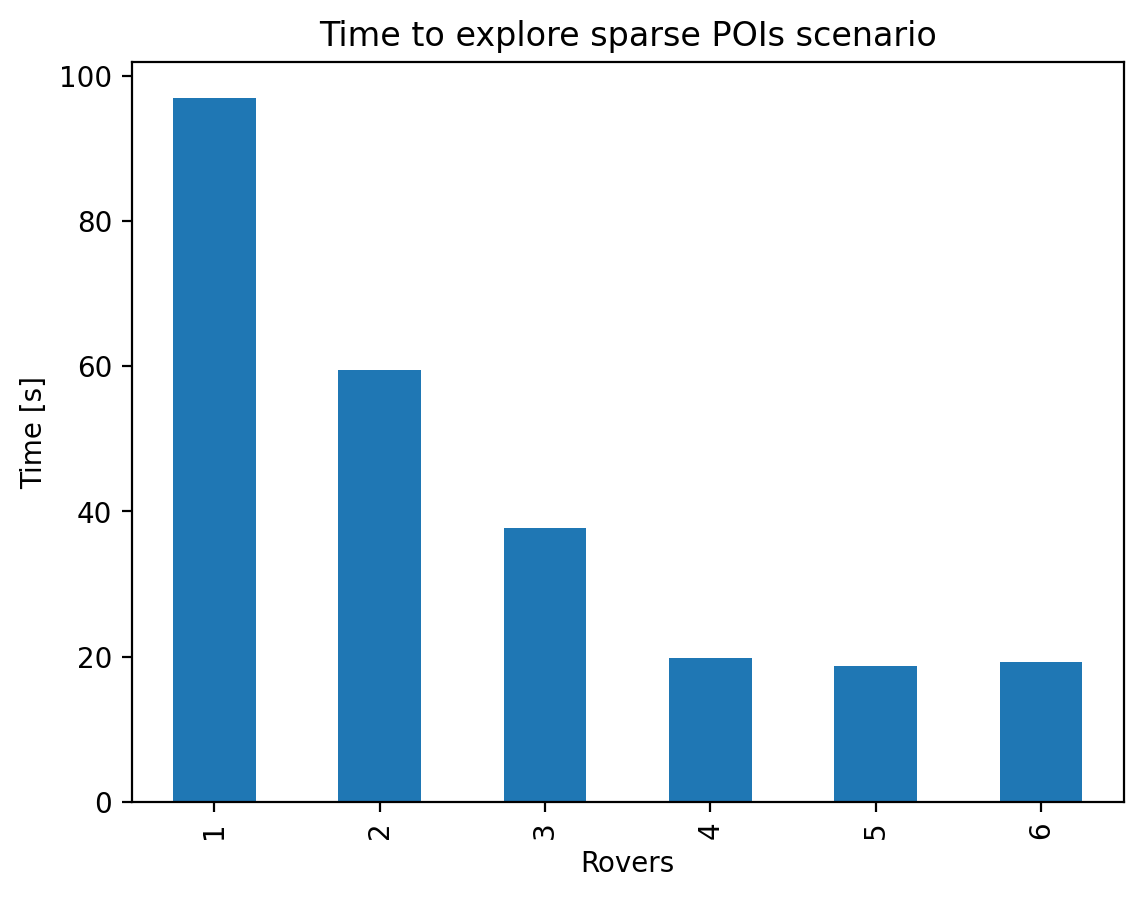

In [26]:
plt.rcParams["figure.dpi"] = 200
df.plot.bar(xlabel="Rovers", ylabel="Time [s]", title="Time to explore sparse POIs scenario", legend=False)

In [25]:
rovers = list(range(1,7))
for rover_count in rovers:
    print(rover_count, end=' ')
    x = 0
    for i in range(rover_count):
        x += 700//(rover_count+1)
        print(x, end=' ')
    print('')

1 350 
2 233 466 
3 175 350 525 
4 140 280 420 560 
5 116 232 348 464 580 
6 100 200 300 400 500 600 


['1687110313.4437766.6.csv',
 '1687110419.5672855.5.csv',
 '1687110522.7915864.4.csv',
 '1687110657.3421829.3.csv',
 '1687111049.542516.1.csv',
 '1687110841.017301.2.csv']

Text(0.5, 1.0, 'Explored area dense scenario')

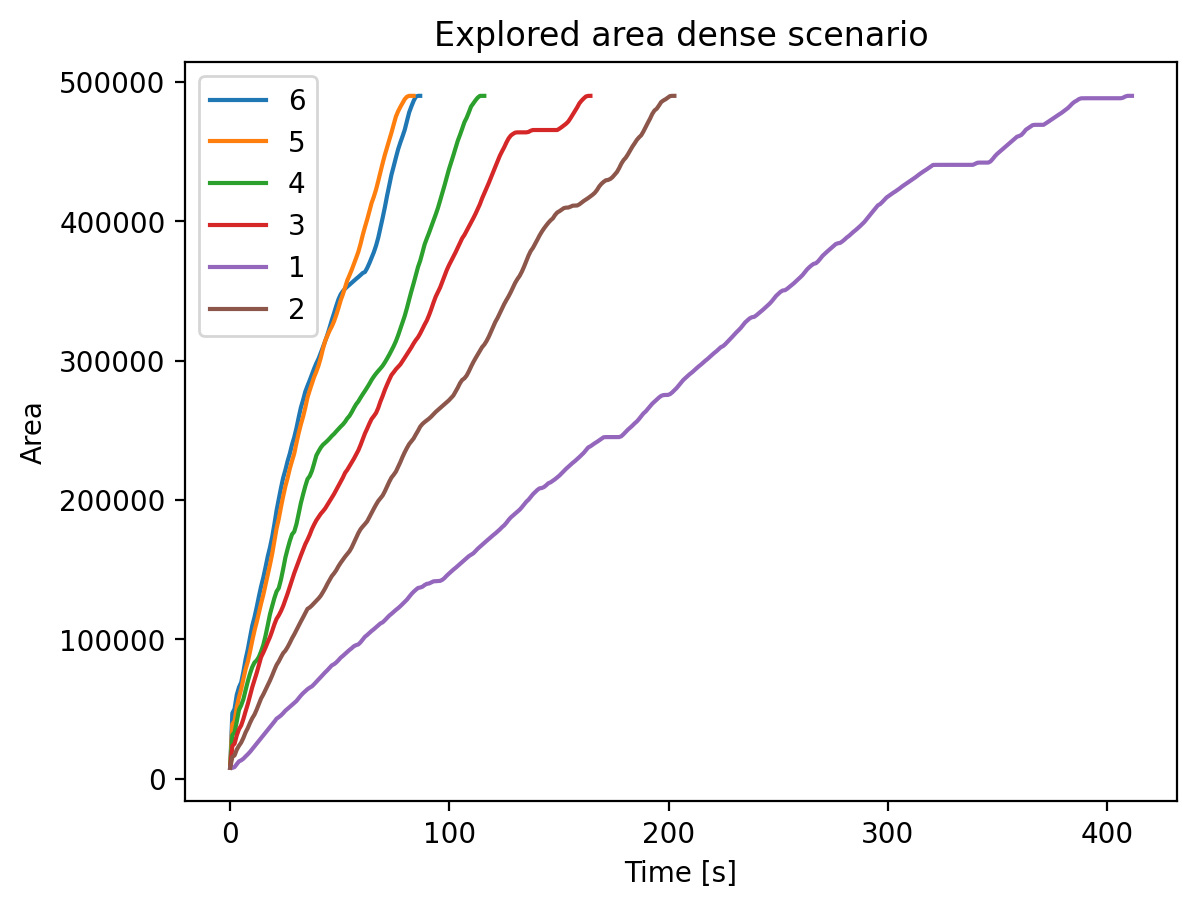

In [76]:
results_path = '../results/dense/area'
results = filter(lambda x: x.split('.')[-1]=='csv', os.listdir(results_path))
results = list(results)
plt.rcParams["figure.dpi"] = 200
for filename in results:
    df = pd.read_csv(os.path.join(results_path, filename))
    df = df.iloc[:df.idxmax()[0]]
    df["Time"] = (df["rospy.time"] - df["rospy.time"][0]) * 1e-9
    df = df.rename(columns={" area": "Area"})
    df = df.drop("rospy.time", axis=1)
    # df.columns

    df = df.set_index("Time")
    # df.plot(xlabel="Time [s]", ylabel="Area")
    rover_count = filename.split('.')[-2]
    plt.plot(df, label=rover_count)
    # plt.legend(rover_count)
    # print(rover_count)
plt.legend()
plt.xlabel("Time [s]")
plt.ylabel("Area")
plt.title("Explored area dense scenario")

Text(0.5, 1.0, 'Explored area sparse scenario')

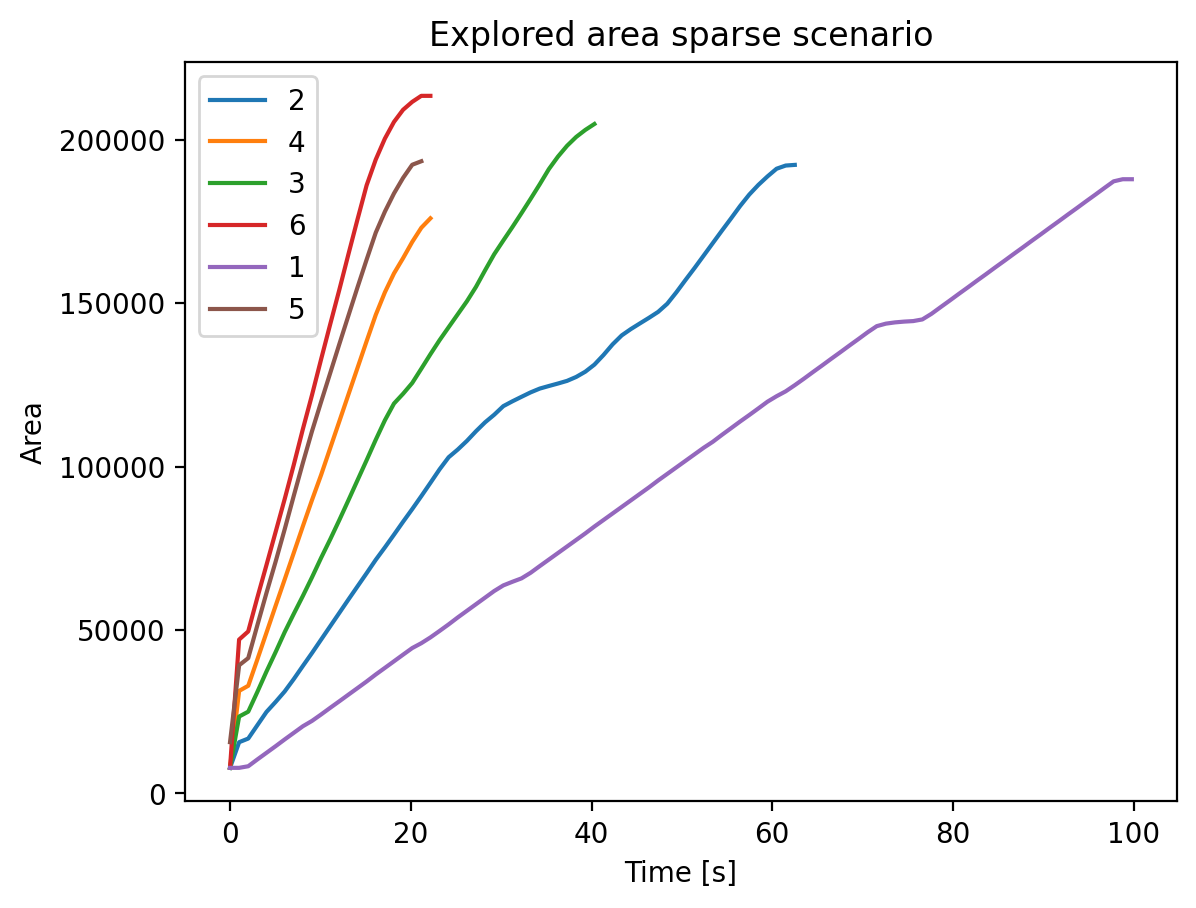

In [77]:
results_path = '../results/sparse/area'
results = filter(lambda x: x.split('.')[-1]=='csv', os.listdir(results_path))
results = list(results)
plt.rcParams["figure.dpi"] = 200
for filename in results:
    df = pd.read_csv(os.path.join(results_path, filename))
    df = df.iloc[:df.idxmax()[0]]
    df["Time"] = (df["rospy.time"] - df["rospy.time"][0]) * 1e-9
    df = df.rename(columns={" area": "Area"})
    df = df.drop("rospy.time", axis=1)
    # df.columns

    df = df.set_index("Time")
    # df.plot(xlabel="Time [s]", ylabel="Area")
    rover_count = filename.split('.')[-2]
    plt.plot(df, label=rover_count)
    # plt.legend(rover_count)
    # print(rover_count)
plt.legend()
plt.xlabel("Time [s]")
plt.ylabel("Area")
plt.title("Explored area sparse scenario")

In [9]:
final = []
for filename in results:
    df = pd.read_csv(os.path.join(results_path, filename))
    time, area = df.iloc[df.idxmax().values[1],:] - df.iloc[0,:]
    time = time/1e9
    rover_count = filename.split('.')[-2]
    final.append({'Filename': filename, 'Rovers': rover_count, 'Time': time, 'Area': area})
df = pd.DataFrame(final)
df

,Filename,Rovers,Time,Area
0,1687110313.4437766.6.csv,6,86.687523,482155.0
1,1687110419.5672855.5.csv,5,82.655912,482155.0
2,1687110522.7915864.4.csv,4,114.912837,482154.0
3,1687110657.3421829.3.csv,3,164.309094,482155.0
4,1687111049.542516.1.csv,1,410.290141,482155.0
5,1687110841.017301.2.csv,2,201.600195,482155.0


In [10]:
df = df.drop("Filename", axis=1)
df = df.drop("Area", axis=1)
df

,Rovers,Time
0,6,86.687523
1,5,82.655912
2,4,114.912837
3,3,164.309094
4,1,410.290141
5,2,201.600195
